# Students info
- Student number: s3804803
- Student name: Nguyen Bao Ngan

# 1. Preprocessing

In [2]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Loading data and check if it's loaded properly
df = pd.read_csv("Paitients_Files_Train.csv", delimiter=",")
df.head() 

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# drop 2 irrelevant columns: ID and Insurance
df.drop(columns="ID", inplace=True)
df.drop(columns="Insurance", inplace=True)

In [5]:
# rename the column so that it's easier to evaluate them later
df = df.rename(columns={
    "PRG": "BGlucose",
    "PR": "BPressure",
    "PL": "B1",
    "SK": "B2",
    "TS": "B3",
    "BD2": "B4",
    "M11": "BMI"
})

## 1.1 Check data types, null values
- According to the below table, 10 features don't have any missing values, 599 out 599 is non-null. However, in the first 15 records, we see that there are some value = 0 ?, so we need look it up to see if 0 is valid value for those columns.

In [6]:
# Inspect data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BGlucose   599 non-null    int64  
 1   B1         599 non-null    int64  
 2   BPressure  599 non-null    int64  
 3   B2         599 non-null    int64  
 4   B3         599 non-null    int64  
 5   BMI        599 non-null    float64
 6   B4         599 non-null    float64
 7   Age        599 non-null    int64  
 8   Sepssis    599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [7]:
pd.isna(df).sum()

BGlucose     0
B1           0
BPressure    0
B2           0
B3           0
BMI          0
B4           0
Age          0
Sepssis      0
dtype: int64

In [8]:
df.describe()

,BGlucose,B1,BPressure,B2,B3,BMI,B4,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Data Analysis
- There is lots of missing values that need to be replaced.

- **Mass Index**:Mostly overweight.
- **Age**: very young age group. Usually sepsis is detected in patient over 50 years

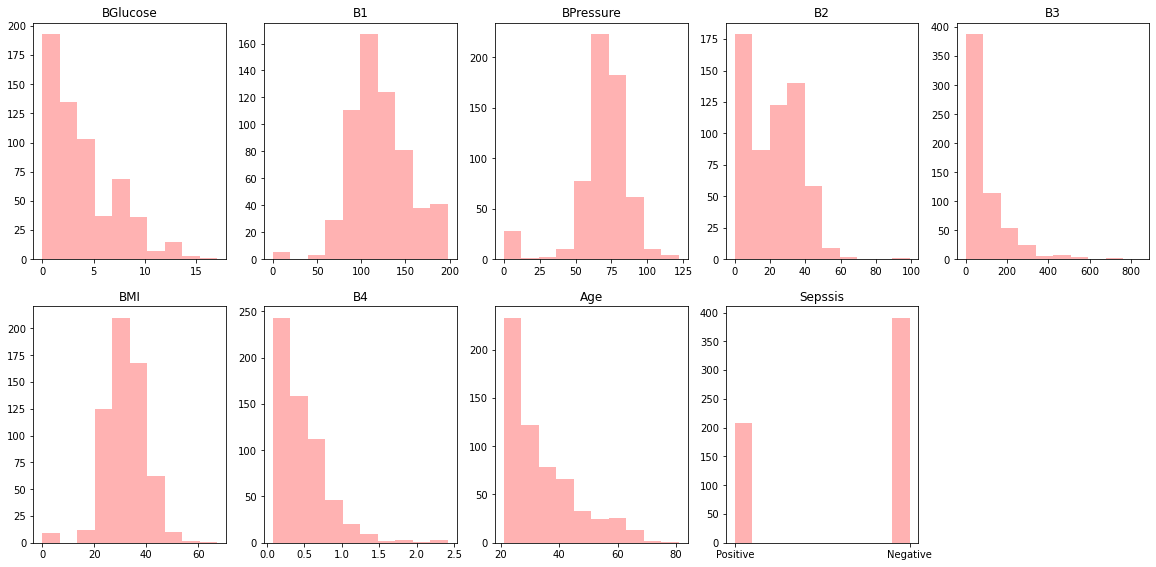

In [9]:
# More visualization to analysis dataset
plt.figure(figsize= (20,20))
n = len(df.columns)

for i, col in enumerate(df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color="r")
    plt.title(col)

In [10]:
# Encode target value

from sklearn.preprocessing import LabelEncoder

Y = df[["Sepssis"]]
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

print(Y[:5])

[1 0 1 0 1]


/Users/lap11353-local/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# drop target column
df.drop(columns="Sepssis", inplace=True)

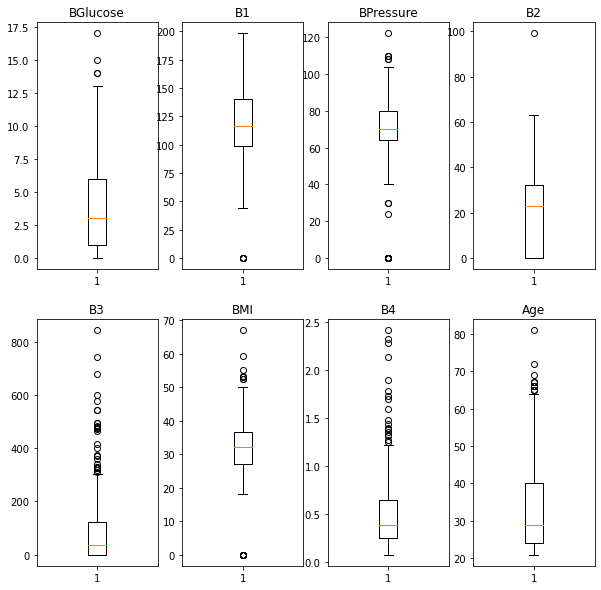

In [12]:

# Boxplot for a range of value
import math
fig, ax = plt.subplots(2,4,figsize=(10,10))

n = len(df.columns)
for i, col in enumerate(df.columns):
    if math.floor(i / 4) >= len(ax):
        continue
    ax_col = ax[math.floor(i / 4), i % 4]
    ax_col.boxplot(df[col])
    ax_col.set_title(col)


Why there are so many outliers...? How should we handle them, because they also appear in test file...

In [13]:
# Outliers
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
for col in df.columns:
    sample_outliers = detect_outliers_zscore(df[col])
    print(f"Outliers of {col}: {len(sample_outliers)}")

Outliers of BGlucose: 4
Outliers of B1: 9
Outliers of BPressure: 37
Outliers of B2: 38
Outliers of B3: 52
Outliers of BMI: 63
Outliers of B4: 72
Outliers of Age: 75


In [14]:
import numpy as np
for col in df.columns:
    percentiles = df[col].quantile([0.01, 0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

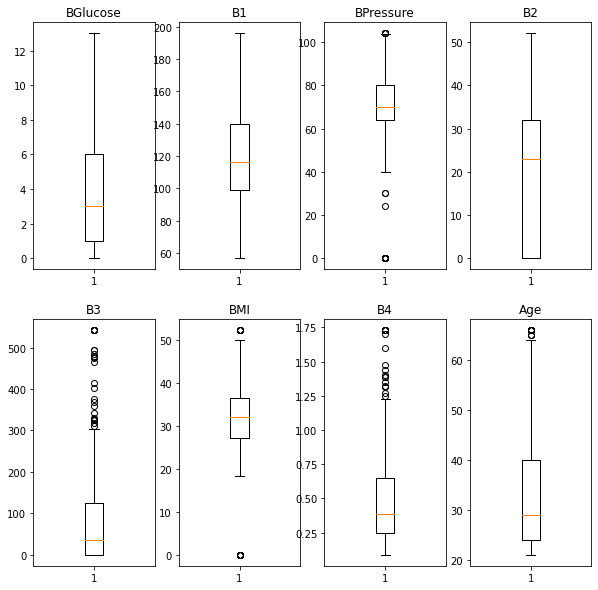

In [15]:
# Boxplot after removing outliers
import math
fig, ax = plt.subplots(2,4,figsize=(10,10))

n = len(df.columns)
for i, col in enumerate(df.columns):
    if math.floor(i / 4) >= len(ax):
        continue
    ax_col = ax[math.floor(i / 4), i % 4]
    ax_col.boxplot(df[col])
    ax_col.set_title(col)

In [16]:
df.describe()

,BGlucose,B1,BPressure,B2,B3,BMI,B4,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.811352,120.638464,68.660234,20.439466,78.232454,31.876461,0.477130,33.245609
std,3.320576,31.245890,19.182127,15.644498,110.398214,7.866771,0.318419,11.683879
min,0.000000,56.740000,0.000000,0.000000,0.000000,0.000000,0.088980,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,13.000000,196.000000,104.080000,52.040000,543.040000,52.300000,1.732000,66.020000


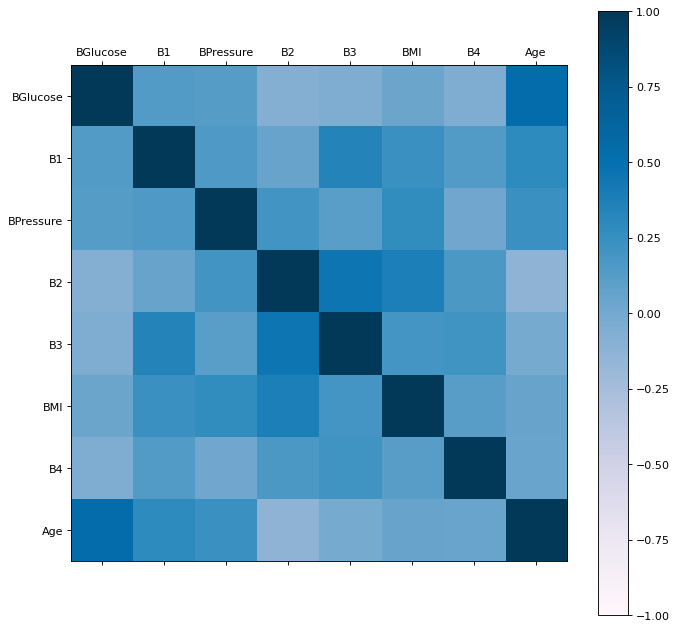

In [17]:
# heatmap
correlations = df.corr()
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,n,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Comment: No depedence detected

### Normalization and Spliting

In [104]:
# use polynomial to improve model fitting
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
df_poly = poly.fit_transform(df)
print(df_poly.shape) # testing

(599, 165)


In [92]:
# Normalization
# from sklearn.preprocessing import StandardScaler

# raw_scaler = StandardScaler()
# raw_scaler.fit(df_poly)
# X_scaled = raw_scaler.transform(df_poly)


In [117]:
# spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, random_state=6, test_size=0.2)
print("Training X:", X_train.shape)
print("Testing X: ",X_test.shape)
print("Train Y: ",y_train.shape)

Training X: (479, 8)
Testing X:  (120, 8)
Train Y:  (479,)


# 2. Model Development

## 2.1 Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE, RandomOverSampler, SMOTEN
from imblearn.under_sampling import RandomUnderSampler

# instantiate the model (using the default parameters)


lr_model = LogisticRegression(C=1, solver="liblinear", 
max_iter=7000, tol=0.01,
penalty="l1", random_state=4)

over = SMOTE(sampling_strategy="minority",random_state=3)
# over =  RandomOverSampler(sampling_strategy=0.3)
# under = RandomUnderSampler(sampling_strategy=0.7)
lr_pipe = Pipeline(steps=[("over",over),("logistic",lr_model) ])
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('over', SMOTE(random_state=3, sampling_strategy='minority')),
                ('logistic',
                 LogisticRegression(C=1, max_iter=7000, penalty='l1',
                                    random_state=4, solver='liblinear',
                                    tol=0.01))])

In [119]:
print("Testing accuracy: %.3f"%lr_pipe.score(X_test, y_test))

Testing accuracy: 0.792


In [120]:
lr_pred = lr_pipe.predict(X_test)

In [121]:
# SearchGrid CV
from sklearn.model_selection import GridSearchCV
param_grid = {
    "logistic__C":np.logspace(-4, 2, 4),
    "logistic__class_weight": [{0:0.2, 1: 0.8},{0:0.3,1:0.7},{0:0.4,1:0.6}, {0:0.5,1:0.5}],
    "logistic__penalty":["l1","l2"]
}
search = GridSearchCV(lr_pipe, param_grid, scoring="f1",cv=10)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.671):
{'logistic__C': 1.0, 'logistic__class_weight': {0: 0.5, 1: 0.5}, 'logistic__penalty': 'l1'}


In [122]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr_pred)

Text(0.5, 257.44, 'Predicted label')

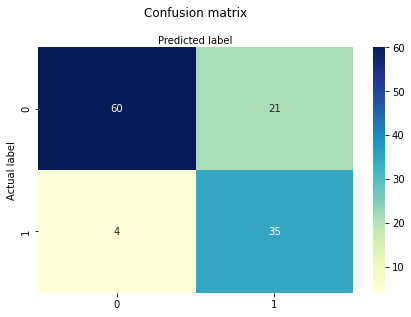

In [123]:
class_names=["Positive","Negative"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [124]:
# Evaluation framework
from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))
# print("Precision:",metrics.precision_score(y_test, lr_pred))
# print("Recall:",metrics.recall_score(y_test, lr_pred))
print(metrics.classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        81
           1       0.62      0.90      0.74        39

    accuracy                           0.79       120
   macro avg       0.78      0.82      0.78       120
weighted avg       0.84      0.79      0.80       120



**Comments**: 
- The accuracy of the model on validation data set is 76%. 
- The model is better in predict negative sepsis than the positive one. Is that a good thing?

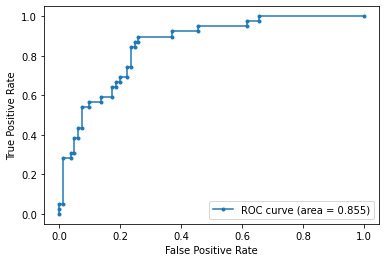

In [218]:
# plot auc, roc
from sklearn.metrics import roc_auc_score, roc_curve
model_probs = lr_pipe.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## 2.2 Ridge Regression


In [125]:
from sklearn.linear_model import RidgeClassifier
# Using polynomial features up to 5 gave false negative = 9
ridge_model = RidgeClassifier(
    alpha=0.0001, random_state=3, class_weight="balanced"
)
over = SMOTE(sampling_strategy="minority",random_state=3)
# over =  RandomOverSampler(sampling_strategy=0.3)
# under = RandomUnderSampler(sampling_strategy=0.7)
ridge_pipe = Pipeline(steps=[("over",over),("ridge",ridge_model) ])
ridge_pipe.fit(X_train, y_train)
print("Training Accuracy: ", ridge_pipe.score(X_test, y_test))

Training Accuracy:  0.7916666666666666


In [126]:
param_grid = {
    "ridge__alpha":np.logspace(-4, 2, 4),
}
search = GridSearchCV(ridge_pipe, param_grid, scoring="f1",cv=10)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.669):
{'ridge__alpha': 0.0001}


Accuracy: 0.7916666666666666
Precision: 0.6296296296296297
Recall: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        81
           1       0.63      0.87      0.73        39

    accuracy                           0.79       120
   macro avg       0.78      0.81      0.78       120
weighted avg       0.83      0.79      0.80       120



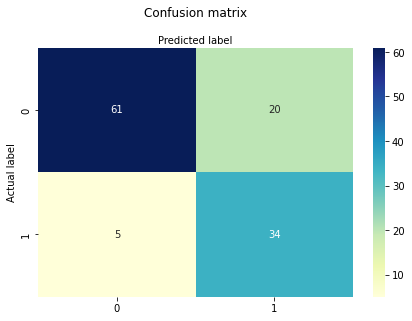

In [127]:
ridge_pred = ridge_pipe.predict(X_test)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, ridge_pred)
class_names=["Positive","Negative"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, ridge_pred))
print("Precision:",metrics.precision_score(y_test, ridge_pred))
print("Recall:",metrics.recall_score(y_test, ridge_pred))
print(metrics.classification_report(y_test, ridge_pred))

## 2.3 Decision Tree Classifier